In [5]:
import numpy as np
import matplotlib.pyplot as plt

 # simulation output filename
file_name = 'output.txt'

# simulation parameters
gamma = Nb = Ns = None
with open(file_name) as f:
    for line in f:
        # Find out standoff distance
        if line.startswith("gamma"):
            gamma = float(line.rsplit(None, 1)[-1])
        # Find out number of points on bubble's interface
        elif line.startswith("Nb"):
            Nb = int(line.rsplit(None, 1)[-1])
        # Find out number of points on fluid-fluid interface
        elif line.startswith("Ns"):
            Ns = int(line.rsplit(None, 1)[-1])

        if gamma is not None and Nb is not None and Ns is not None:
            break

# load data
coordinates = np.genfromtxt(file_name, skip_header = 10, skip_footer=1)
time = coordinates[:, 1] # time vector
print(f'Size of time vector is {time.shape}')
r_b = coordinates[:, 2:Nb+3] # r-coordinates bubble = 1027 rows of 51 points (x coords)
print(f'Size of x vector is {r_b.shape}')
print(r_b[0])
z_b = coordinates[:, Nb+3:2*Nb+4] #z-coordinates bubble surface # z-coordinates bubble = 1027 rows of 51 points (y coords)
print(f'Size of y vector is {z_b.shape}')
r_s = coordinates[:, 4*Nb+6:4*Nb+6+Ns+1] # r-coordinates fluid-fluid interface
z_s = coordinates[:, 4*Nb+6+Ns+1:4*Nb+6+2*Ns+2] # z-coordinates fluid-fluid interface

# region of interest for plots
ymin = - gamma - 1.5
ymax = - gamma + 2.5
xmin = -2.0
xmax = 2.0
np.savetxt('t.txt',time,delimiter=',')
np.savetxt('r.txt',r_b,delimiter=',')
np.savetxt('z.txt',z_b,delimiter=',')

Size of time vector is (718,)
Size of x vector is (718, 101)
[0.        0.0314108 0.0627905 0.0941083 0.125333  0.156434  0.187381
 0.218143  0.24869   0.278991  0.309017  0.338738  0.368125  0.397148
 0.425779  0.45399   0.481754  0.509041  0.535827  0.562083  0.587785
 0.612907  0.637424  0.661312  0.684547  0.707107  0.728969  0.750111
 0.770513  0.790155  0.809017  0.827081  0.844328  0.860742  0.876307
 0.891007  0.904827  0.917755  0.929776  0.940881  0.951057  0.960294
 0.968583  0.975917  0.982287  0.987688  0.992115  0.995562  0.998027
 0.999507  1.        0.999507  0.998027  0.995562  0.992115  0.987688
 0.982287  0.975917  0.968583  0.960294  0.951057  0.940881  0.929776
 0.917755  0.904827  0.891007  0.876307  0.860742  0.844328  0.827081
 0.809017  0.790155  0.770513  0.750111  0.728969  0.707107  0.684547
 0.661312  0.637424  0.612907  0.587785  0.562083  0.535827  0.509041
 0.481754  0.45399   0.425779  0.397148  0.368125  0.338738  0.309017
 0.278991  0.24869   0.218143

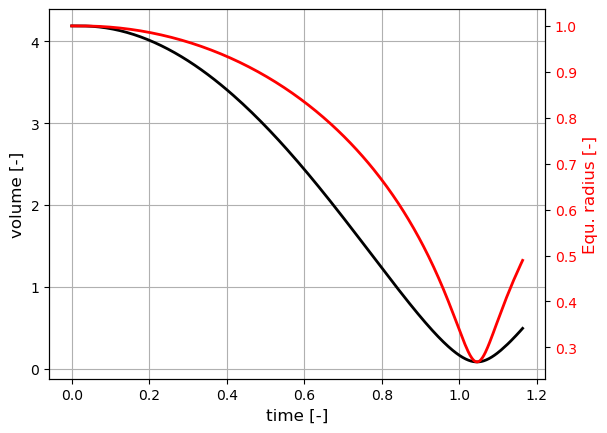

In [6]:
# bubble volume and equivalent radius temporal evolution
volume = coordinates[:, -1] 
radius = (3.0 / 4.0 * volume / np.pi)**(1.0 / 3.0)

fig = plt.figure(1)
ax1 = fig.add_subplot(111)
plt.grid()
ax1.plot(time, volume, '-k', linewidth = 2, label = 'Volume')
ax1.set_ylabel('volume [-]',fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlabel('time [-]', fontsize=12)
ax2 = ax1.twinx()
ax2.plot(time, radius, '-r', linewidth = 2, label = 'Equ. radius')
ax2.set_ylabel('Equ. radius [-]',fontsize=12, color = 'red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()

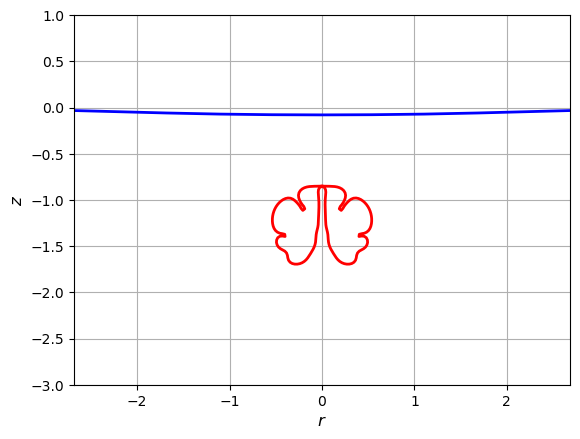

In [7]:
# bubble and fluid-fluid interface shape
time_step = -1 # time step of interest

# bubble
rb = r_b[time_step, :]
zb = z_b[time_step, :]
rb_flip = np.flipud(rb)
zb_flip = np.flipud(zb)
rb_tot = np.concatenate((rb, -rb_flip))
zb_tot = np.concatenate((zb, zb_flip))
# fluid-fluid interface
rs = r_s[-1, :]
zs = z_s[-1, :]
rs_flip = np.flipud(rs)
zs_flip = np.flipud(zs)
rs_tot = np.concatenate((rs, -rs_flip))
zs_tot = np.concatenate((zs, zs_flip))

fig = plt.figure(1)
plt.axis('equal')
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.grid()
plt.plot(rb_tot, zb_tot, '-r', linewidth = 2)
plt.plot(rs_tot, zs_tot, '-b', linewidth = 2)
plt.xlabel(r'$r$',fontsize=12)
plt.ylabel(r'$z$',fontsize=12)
plt.show()

In [8]:
# animation
from matplotlib.animation import FFMpegWriter

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# create time vector at constant time intervals
n_dt = len(coordinates[:, 0])
indices = []
time_max = time[-1]
iterations = int(n_dt / 5)   # temporal resolution control
dt = time_max / iterations

for i in range(iterations):
    index = find_nearest(time, i * dt)
    indices.append(index)

# ---------- video writer setup ----------
fig = plt.figure(1)
writer = FFMpegWriter(fps=10)
writer.setup(fig, "output.mp4", dpi=200)

# for loop to display bubble and fluid-fluid interface temporal evolution
for i in range(iterations):
    ti = int(indices[i])  # time step

    # bubble
    rb = r_b[ti, :]
    zb = z_b[ti, :]
    rb_flip = np.flipud(rb)
    zb_flip = np.flipud(zb)
    rb_tot = np.concatenate((rb, -rb_flip))
    zb_tot = np.concatenate((zb, zb_flip))

    # fluid-fluid interface
    rs = r_s[ti, :]
    zs = z_s[ti, :]
    rs_flip = np.flipud(rs)
    zs_flip = np.flipud(zs)
    rs_tot = np.concatenate((rs, -rs_flip))
    zs_tot = np.concatenate((zs, zs_flip))

    plt.clf()
    plt.axis('equal')
    plt.ylim(ymin, ymax)
    plt.xlim(xmin, xmax)
    plt.grid()

    plt.plot(rb_tot, zb_tot, '-r', linewidth=2)
    plt.plot(rs_tot, zs_tot, '-b', linewidth=2)

    plt.xlabel(r'$r$', fontsize=12)
    plt.ylabel(r'$z$', fontsize=12)

    writer.grab_frame()

# ---------- finalize video ----------
writer.finish()
plt.close(fig)